## Generative and Discriminative Modelling Project

##### 1. Write a python class to implement   Gaussian Discriminant Analysis(GDA) and another class to implement Naive Bayes (NB) algorithm from scratch. Test your models with the dataset.

##### 2. Using the dataset given, compare Gaussian Discriminant Analysis and NaiveBayes with Logistic regression using a different size of the dataset. 
Use the following sizes of the data for comparison;

• 10% of the data

• 30% of the data

• 60% of the data

• 100% of the data

You would be working with a text data from the UCL repository

In [1]:
#importing the necessary library needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import train and test data
train_data = pd.read_table('drugLibTrain_raw.tsv')
test_data = pd.read_table('drugLibTest_raw.tsv')

In [3]:
# Check the data type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
Unnamed: 0           3107 non-null int64
urlDrugName          3107 non-null object
rating               3107 non-null int64
effectiveness        3107 non-null object
sideEffects          3107 non-null object
condition            3106 non-null object
benefitsReview       3107 non-null object
sideEffectsReview    3105 non-null object
commentsReview       3099 non-null object
dtypes: int64(2), object(7)
memory usage: 218.5+ KB


In [4]:
# Check the data type
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
Unnamed: 0           1036 non-null int64
urlDrugName          1036 non-null object
rating               1036 non-null int64
effectiveness        1036 non-null object
sideEffects          1036 non-null object
condition            1036 non-null object
benefitsReview       1036 non-null object
sideEffectsReview    1036 non-null object
commentsReview       1036 non-null object
dtypes: int64(2), object(7)
memory usage: 72.9+ KB


In [5]:
# Merge dataframe for data cleaning and preprocessing
all_df = pd.concat([train_data, test_data]).reset_index(drop=True)

In [6]:
print("Train Dataframe shape: ", train_data.shape)
print("Test Dataframe shape: ", test_data.shape)
print("Combined Dataframe shape: ", all_df.shape)

Train Dataframe shape:  (3107, 9)
Test Dataframe shape:  (1036, 9)
Combined Dataframe shape:  (4143, 9)


#### Observation:
In all, there are 4143 rows and 4 columns in the data set.

In [57]:
# The whole data frame
all_df.head(5)

Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  rating_binary  
0  monitor blood pressure , weight and asses for ...              0  
1  I Hate This Birth Control, I Would Not Suggest...              0  
2  I took 2 pills at the onset of my menstrual cr...              1  
3  I was given Prilosec prescription at a dose of...              0  
4                                          See above              0

In [8]:
# This are the only numerical columns
all_df.describe()

Unnamed: 0       rating
count  4143.000000  4143.000000
mean   2081.808834     6.946416
std    1202.018138     2.948868
min       0.000000     1.000000
25%    1041.500000     5.000000
50%    2083.000000     8.000000
75%    3123.500000     9.000000
max    4161.000000    10.000000

##### Obervation:
The minimum rating is 1 and the maximum rating is 10. The mean rating is 6.9416, 50% of the ratings are 8. However, the column unknown has a very high range, as the minimum is 0 while te maximum is 4161. it would be nice to have a scatter plot that would show the relationship between column 'unknown' and rating

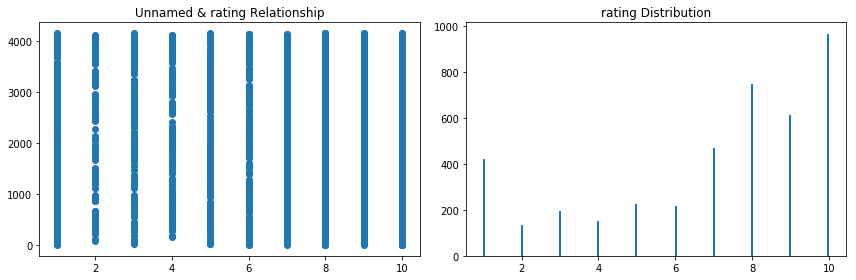

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(all_df['rating'], all_df['Unnamed: 0'])
ax[1].hist(all_df['rating'], bins=200)

ax[0].set_title("Unnamed & rating Relationship")
ax[1].set_title("rating Distribution")

plt.tight_layout()

#### Observation:
From the scatter plot, it is observed that there is no linear relationship between column
'unknown' and rating. however, maybe the long tramsformation would help reduce the variance. let's see

In [10]:
d = all_df[['Unnamed: 0','rating']]
df = pd.DataFrame(d)
df['Unnamed: 0' ] = np.log(df['Unnamed: 0'])
df.head()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0  rating
0    7.697121       4
1    8.044626       1
2    7.044033      10
3    8.280711       3
4    7.576097       2

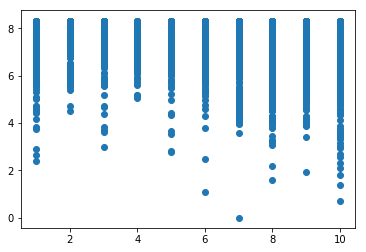

In [11]:
plt.scatter(df['rating'], df['Unnamed: 0'])

#### Observation:
After afpplying the log transformation, the relationship was still not linear, hence,it might not really predict the target variable 'rating' 

In [39]:
# Converting every rating that is >= 5 as 1, while rating less than 5 are 0
all_df['rating_binary'] = (all_df['rating']>= 5).astype(int)
all_df['rating_binary'].head()

0    0
1    0
2    1
3    0
4    0
Name: rating_binary, dtype: int64

In [14]:
# The 5 levels of 'effectiveness'
all_df.effectiveness.unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [15]:
# The five levels of 'sideEffects'
all_df.sideEffects.unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

 Since the are only 5 levels in 'effectiveness' and 'sideEffect', a one-hot-encoding would be fine rathet than using teh bag of words

In [16]:
#!pip3 install category_encoders
import category_encoders as ce

In [17]:
# One-hot-encoding for the variable 'sideEffects'
cat_sideEffects_onehot = all_df.copy()
cat_sideEffects_onehot = pd.get_dummies(cat_sideEffects_onehot, columns=['sideEffects'], prefix = ['sideEffects'])

df = pd.DataFrame(cat_sideEffects_onehot)
df.head(3)

Unnamed: 0       urlDrugName  rating     effectiveness  \
0        2202         enalapril       4  Highly Effective   
1        3117  ortho-tri-cyclen       1  Highly Effective   
2        1146           ponstel      10  Highly Effective   

                                condition  \
0  management of congestive heart failure   
1                        birth prevention   
2                        menstrual cramps   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   

                                      commentsReview  rating_binary  \
0  monitor blood pressure , weight and asses for ...              0   
1  I Hate This Birth Control, I Would Not Suggest...              0   
2  I took 2 pills at the onset of my menstrual cr...              1   

   sideEffects_Extremely Severe Side Effects  sideEffects_Mild Side Effects  \
0                                          0                              1   
1                                          0                              0   
2                                          0                              0   

   sideEffects_Moderate Side Effects  sideEffects_No Side Effects  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            1   

   sideEffects_Severe Side Effects  
0                                0  
1                                1  
2                                0

In [43]:
# One-hot-encoding for the variable 'effectiveness'
cat_effectiveness_onehot = df.copy()
cat_effectiveness_onehot = pd.get_dummies(cat_sideEffects_onehot, columns=['effectiveness'], prefix = ['effectiveness'])

dff = pd.DataFrame(cat_effectiveness_onehot)
dff.head(3)

Unnamed: 0       urlDrugName  rating  \
0        2202         enalapril       4   
1        3117  ortho-tri-cyclen       1   
2        1146           ponstel      10   

                                condition  \
0  management of congestive heart failure   
1                        birth prevention   
2                        menstrual cramps   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   

                                      commentsReview  rating_binary  \
0  monitor blood pressure , weight and asses for ...              0   
1  I Hate This Birth Control, I Would Not Suggest...              0   
2  I took 2 pills at the onset of my menstrual cr...              1   

   sideEffects_Extremely Severe Side Effects  sideEffects_Mild Side Effects  \
0                                          0                              1   
1                                          0                              0   
2                                          0                              0   

   sideEffects_Moderate Side Effects  sideEffects_No Side Effects  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            1   

   sideEffects_Severe Side Effects  effectiveness_Considerably Effective  \
0                                0                                     0   
1                                1                                     0   
2                                0                                     0   

   effectiveness_Highly Effective  effectiveness_Ineffective  \
0                               1                          0   
1                               1                          0   
2                               1                          0   

   effectiveness_Marginally Effective  effectiveness_Moderately Effective  
0                                   0                                   0  
1                                   0                                   0  
2                                   0                                   0

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
# Concatinating the all other columns to get a bag of words before using the Countvectorizer
All_data = dff['condition'] + dff['sideEffectsReview'] + dff['benefitsReview'] + dff['commentsReview'] 

In [51]:
All_data.head()

0    management of congestive heart failurecough, h...
1    birth preventionHeavy Cycle, Cramps, Hot Flash...
2    menstrual crampsHeavier bleeding and clotting ...
3    acid refluxConstipation, dry mouth and some mi...
4    fibromyalgiaI felt extremely drugged and dopey...
dtype: object

In [52]:
count_vec = CountVectorizer(max_features=150, binary=True)
All_data = All_data.apply(lambda x: str(x))

A=count_vec.fit_transform(All_data)
A = A.toarray()
All_data = A

In [53]:
# The Countvectorizer outputs the first most occuring 150 words.
All_data= pd.DataFrame(All_data)
All_data.head()

0    1    2    3    4    5    6    7    8    9   ...   140  141  142  143  \
0    0    0    0    0    0    0    0    0    1    0 ...     0    0    0    1   
1    0    0    0    0    0    1    0    0    0    0 ...     0    0    0    1   
2    0    1    0    0    0    0    0    1    1    0 ...     0    0    0    0   
3    0    1    1    1    0    0    0    0    1    0 ...     0    0    0    0   
4    0    0    0    0    1    1    0    0    1    0 ...     0    1    0    1   

   144  145  146  147  148  149  
0    0    0    0    0    0    0  
1    0    0    0    1    0    0  
2    0    0    0    1    0    0  
3    0    0    0    1    1    0  
4    0    0    0    0    0    0  

[5 rows x 150 columns]

Since I have 2 dataframes, one from the one-hot-encoding and the other from the countvectorizer,
I just need to pop out the columns I had already vectorize in the dataframe dff

In [55]:
pop_Unnamed = dff.pop('Unnamed: 0')
pop_urlDrugName = dff.pop('urlDrugName')
pop_condition = dff.pop('condition')
pop_benefitsReview = dff.pop('benefitsReview')
pop_sideEffectsReview = dff.pop('sideEffectsReview')
pop_commentsReview = dff.pop('commentsReview')
pop_rating = dff.pop('rating')

In [56]:
dff.head(5)

rating_binary  sideEffects_Extremely Severe Side Effects  \
0              0                                          0   
1              0                                          0   
2              1                                          0   
3              0                                          0   
4              0                                          0   

   sideEffects_Mild Side Effects  sideEffects_Moderate Side Effects  \
0                              1                                  0   
1                              0                                  0   
2                              0                                  0   
3                              1                                  0   
4                              0                                  0   

   sideEffects_No Side Effects  sideEffects_Severe Side Effects  \
0                            0                                0   
1                            0                                1   
2                            1                                0   
3                            0                                0   
4                            0                                1   

   effectiveness_Considerably Effective  effectiveness_Highly Effective  \
0                                     0                               1   
1                                     0                               1   
2                                     0                               1   
3                                     0                               0   
4                                     0                               0   

   effectiveness_Ineffective  effectiveness_Marginally Effective  \
0                          0                                   0   
1                          0                                   0   
2                          0                                   0   
3                          0                                   1   
4                          0                                   1   

   effectiveness_Moderately Effective  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0

In [26]:
# Reset the index values to the first dataframe appends properly
All_data = All_data.reset_index(drop=True)
All_data.head()

0    1    2    3    4    5    6    7    8    9   ...   140  141  142  143  \
0    0    0    0    0    0    0    0    0    1    0 ...     0    0    0    1   
1    0    0    0    0    0    1    0    0    0    0 ...     0    0    0    1   
2    0    1    0    0    0    0    0    1    1    0 ...     0    0    0    0   
3    0    1    1    1    0    0    0    0    1    0 ...     0    0    0    0   
4    0    0    0    0    1    1    0    0    1    0 ...     0    1    0    1   

   144  145  146  147  148  149  
0    0    0    0    0    0    0  
1    0    0    0    1    0    0  
2    0    0    0    1    0    0  
3    0    0    0    1    1    0  
4    0    0    0    0    0    0  

[5 rows x 150 columns]

In [27]:

# Now that I have the two dataframes ready to analize, I concatinated them.  
horizontal_stack = pd.concat([dff, All_data], axis=1)
horizontal_stack.head()

rating_binary  sideEffects_Extremely Severe Side Effects  \
0              0                                          0   
1              0                                          0   
2              1                                          0   
3              0                                          0   
4              0                                          0   

   sideEffects_Mild Side Effects  sideEffects_Moderate Side Effects  \
0                              1                                  0   
1                              0                                  0   
2                              0                                  0   
3                              1                                  0   
4                              0                                  0   

   sideEffects_No Side Effects  sideEffects_Severe Side Effects  \
0                            0                                0   
1                            0                                1   
2                            1                                0   
3                            0                                0   
4                            0                                1   

   effectiveness_Considerably Effective  effectiveness_Highly Effective  \
0                                     0                               1   
1                                     0                               1   
2                                     0                               1   
3                                     0                               0   
4                                     0                               0   

   effectiveness_Ineffective  effectiveness_Marginally Effective ...   140  \
0                          0                                   0 ...     0   
1                          0                                   0 ...     0   
2                          0                                   0 ...     0   
3                          0                                   1 ...     0   
4                          0                                   1 ...     0   

   141  142  143  144  145  146  147  148  149  
0    0    0    1    0    0    0    0    0    0  
1    0    0    1    0    0    0    1    0    0  
2    0    0    0    0    0    0    1    0    0  
3    0    0    0    0    0    0    1    1    0  
4    1    0    1    0    0    0    0    0    0  

[5 rows x 161 columns]

In [28]:
# Converting them to a numpy array
train_data = horizontal_stack.values
train_data

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0]])

In [29]:
# #10% training Example
# np.random.seed(0)
# order = np.random.permutation(len(train_data))
# split = int(len(train_data)*0.1)
# Train_X = train_data[order[:split]][:, 1:]
# Train_Y = train_data[order[:split]][: ,0]

# Test_X = train_data[order[split:]][:, 1:]
# Test_Y = train_data[order[split:]][: ,0]

In [30]:
# #30% training Example
# np.random.seed(0)

# order = np.random.permutation(len(train_data))
# split = int(len(train_data)*0.3)
# Train_X = train_data[order[:split]][:, 1:]
# Train_Y = train_data[order[:split]][: ,0]

# Test_X = train_data[order[split:]][:, 1:]
# Test_Y = train_data[order[split:]][: ,0]

In [31]:
#60% training Example
np.random.seed(0)

order = np.random.permutation(len(train_data))
split = int(len(train_data)*0.6)
Train_X = train_data[order[:split]][:, 1:]
Train_Y = train_data[order[:split]][: ,0]

Test_X = train_data[order[split:]][:, 1:]
Test_Y = train_data[order[split:]][: ,0]

In [32]:
# #100% training Example
# np.random.seed(0)

# order = np.random.permutation(len(train_data))
# split = int(len(train_data)*1)
# Train_X = train_data[order[:split]][:, 1:]
# Train_Y = train_data[order[:split]][: ,0]

# #Test_X = train_data[order[split:]][:, 1:]
# #Test_Y = train_data[order[split:]][: ,0]



In [33]:
print('shape of my features', Train_X.shape)
print()
print('shape of my Target', Train_Y.shape)

shape of my features (2485, 160)

shape of my Target (2485,)


In [36]:
class GDA:
    def __init__(self):
        pass
        
    def phi(self, Train_Y):
        return (1/self.m)* np.sum((Train_Y==1))

    def means(self, Train_X, Train_Y):
        M_0 = np.mean(Train_X[(Train_Y ==0)], axis=0)
        M_1 = np.mean(Train_X[(Train_Y ==1)], axis=0)
        return M_0, M_1

    def mean_difference(self, Train_X, Train_Y):
        
        mu_diff = np.zeros(Train_X.shape)
        for i in range(self.m):
            if Train_Y[i] == 0:
                X_t = Train_X[i] - self.M_0
            else:
                X_t = Train_X[i]- self.M_1
            mu_diff[i] = X_t
        return mu_diff
    
    
    def covariance(self):
        sigma = (np.dot(self.mu_diff.T, self.mu_diff))/self.m
        return sigma
    
    def fit(self, Train_X, Train_Y):
        
        self.m, self.n = Train_X.shape
        
        self.phi_1 = self.phi(Train_Y)
        self.M_0, self.M_1 = self.means(Train_X, Train_Y)
        self.mu_diff = self.mean_difference(Train_X, Train_Y)
        self.sigma = self.covariance() + 1e-8 * np.eye(self.n)

        return self
    
    def p_x_y_equals_0(self, X): 
    
        det_sigma = np.linalg.det(self.sigma)
        inv_sigma = np.linalg.pinv(self.sigma)
        
        compu_1 = 1./(((2*np.pi)**(self.n/2))*(det_sigma**(1/2)))
        compu_2 = np.dot((X - self.M_0), inv_sigma)
        compu_3 = np.exp(np.sum((-1/2)*(compu_2 * (X - self.M_0)), axis = 1))
        return compu_1*compu_3
    
    
    def p_x_y_equals_1(self,X):
        
        det_sigma = np.linalg.det(self.sigma)
        inv_sigma = np.linalg.pinv(self.sigma)
        
        compu_1 = 1./(((2*np.pi)**(self.n/2))*(det_sigma**(1/2)))
        compu_2 = np.dot((X - self.M_1), inv_sigma)
        compu_3 = np.exp(np.sum((-1/2)*(compu_2 * (X - self.M_1)), axis = 1))
        return compu_1*compu_3
    
    
    def predict_proba(self, Test_X):
        pxy0 = self.p_x_y_equals_0(Test_X)
        pxy1 = self.p_x_y_equals_1(Test_X)

        prob_0 = pxy0 * (1 - self.phi_1)
        prob_1 = pxy1 * self.phi_1

        py = np.concatenate([prob_0.reshape(-1,1), prob_1.reshape(-1,1)], axis=1)
        return py
    
    def predict(self, Test_X):        
        py = self.predict_proba(Test_X)
        predictions = np.argmax(py, axis =1)

        return predictions
        
    
    def accuracy(self,Test_Y):
        y_pred = self.predict(Test_X)
        return np.sum(y_pred == Test_Y) * 100/ len(Test_Y)
    

In [37]:
model1 = GDA()

In [38]:
model1.fit(Train_X, Train_Y)
model1.accuracy(Test_Y)

92.88299155609168

 The accuracy for 10% of the training was 88.60284258514346
 
 The accuracy for 30% of the training was 92.34746639089968
 
 The accuracy for 60% of the training was 92.88299155609168
 
 The accuracy for 100% of the training was 93.38643495051895
 
 ##### Observation:
 
 From the above, above 4 accuracies, it is noticed that GDA algorithm favours small training example, if just 10% of the data could have such a high accuracy of 88.60 whereas, a large training example of 100% has an accuracy of 93.3864, it means GDA performance does not really require a large training example. 